# 11 Goals 
## 11.1 Key Insights
Goals influenced decisions in different ways for genders.

In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect

notebookdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(notebookdir)
srcdir = os.path.join(projdir,"src")
datadir = os.path.join(srcdir,"data")
sys.path.insert(0,notebookdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datadir)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 11.2 Data

In [2]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
# Columns of interest
goal = ['goal_label', 'dec','dec_o', 'yes_rate']

# Data containing independent and various dependent variables
df_goal = df[goal]
df_male_goal = df_male[goal]
df_female_goal = df_female[goal]

## 11.3 Univariate Analysis
The univariate analysis shows that we have 79 missing values. Interests ranged from 1 to 10, with a grand mean of 6.3.

,Seemed like a fun night out,To meet new people,To get a date,To say I did it,Other,Looking for a serious relationship,missing
goal_label,3426,3012,631,510,419,301,79


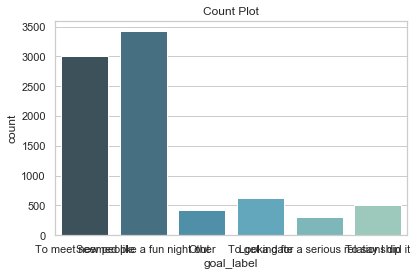

,No,Yes,missing
dec,4860,3518,0


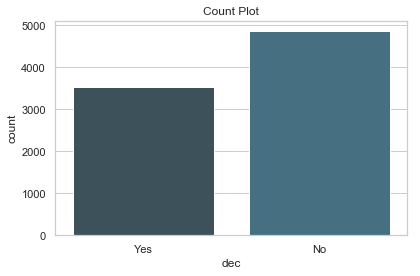

,No,Yes,missing
dec_o,4863,3515,0


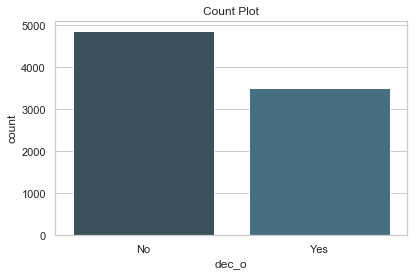

,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
yes_rate,8378.0,0,0.0,0.238095,0.419551,0.4,0.6,1.0,0.0,0.0,-3.0,1.0,Fail to Reject H0


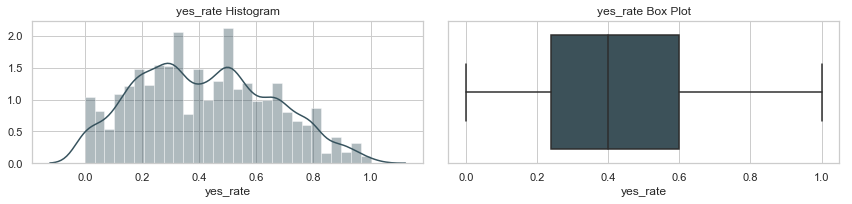

In [3]:
a = univariate.analysis(df_goal)
for a in a:
    a['desc']
    a['plot']



## 11.4 Bivariate Analysis
Those looking for a serious relationship said yes, 

### 11.4.1 Decision by Goal
Higher yes rates tended to associate with the seriousness with which the participant approached the event.

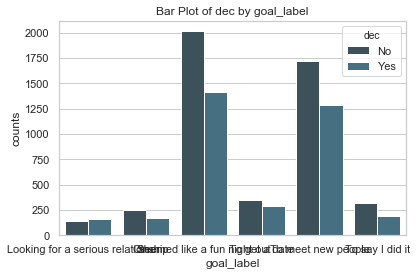

dec,No,Yes
goal_label,,
Looking for a serious relationship,0.478405,0.521595
To get a date,0.549921,0.450079
To meet new people,0.571713,0.428287
All,0.578865,0.421135
Seemed like a fun night out,0.588441,0.411559
Other,0.603819,0.396181
To say I did it,0.631373,0.368627


,x,y,p-Value,Cramer's V,Strength,Result
0,goal_label,dec,0.000284,0.037538,Very Weak Association,Significant


In [7]:
i, d, p = bivariate.analysis(x='goal_label', y='dec', df=df)
p
d['pct'].sort_values(by='Yes', ascending=False)
i

### 11.4.1 Goals by Gender
Females had very different goals than the males. The top 3 reasons for females were the bottom 3 reasons for males. Interestingly, males seemed to approach the event with a seriousness exceeding that of females.

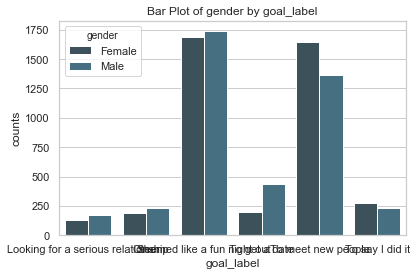

gender,Female,Male
goal_label,,
To meet new people,0.546813,0.453187
To say I did it,0.541176,0.458824
All,0.497048,0.502952
Seemed like a fun night out,0.492411,0.507589
Other,0.451074,0.548926
Looking for a serious relationship,0.428571,0.571429
To get a date,0.312203,0.687797


gender,Female,Male
goal_label,,
To get a date,0.312203,0.687797
Looking for a serious relationship,0.428571,0.571429
Other,0.451074,0.548926
Seemed like a fun night out,0.492411,0.507589
All,0.497048,0.502952
To say I did it,0.541176,0.458824
To meet new people,0.546813,0.453187


,x,y,p-Value,Cramer's V,Strength,Result
0,goal_label,gender,2.985186e-26,0.088342,Very Weak Association,Significant


In [11]:
i, d, p = bivariate.analysis(x='goal_label', y='gender', df=df)
p
d['pct'].sort_values(by='Female', ascending=False)
d['pct'].sort_values(by='Male', ascending=False)
i

## 11.5 Multivariate Analysis

### 11.5.1 Decision by goal and gender 
Again, there was a signfiicant difference in the decisions of each gender, controlling for the goal.



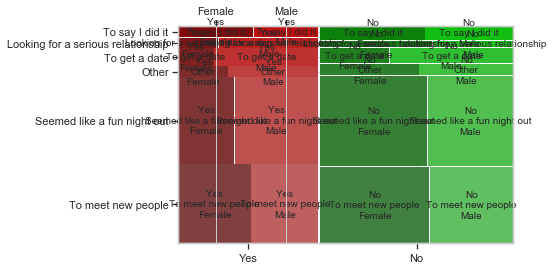

dec                                        No            \
goal_label Looking for a serious relationship     Other   
gender                                                    
Female                               0.583333  0.513834   
Male                                 0.416667  0.486166   

dec                                                                      \
goal_label Seemed like a fun night out To get a date To meet new people   
gender                                                                    
Female                        0.557044      0.360231           0.566202   
Male                          0.442956      0.639769           0.433798   

dec                                                       Yes            \
goal_label To say I did it Looking for a serious relationship     Other   
gender                                                                    
Female            0.543478                           0.286624  0.355422   
Male              0.456522                           0.713376  0.644578   

dec                                                                      \
goal_label Seemed like a fun night out To get a date To meet new people   
gender                                                                    
Female                             0.4      0.253521            0.52093   
Male                               0.6      0.746479            0.47907   

dec                         
goal_label To say I did it  
gender                      
Female            0.537234  
Male              0.462766

,x,y,z,p-Value,Cramer's V,Strength,Result
0,dec,goal_label,gender,1.330909e-49,0.125418,Very Weak Association,Significant


In [16]:
i, d, p = trivariate.analysis(x='dec', y='goal_label', z='gender', df= df)
p
d['pct']
i